In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
import pickle

In [2]:
data=pd.read_csv('/content/car_price_prediction.csv')
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
data.drop('ID',axis=1,inplace=True)

In [4]:
data.shape

(19237, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  object 
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [6]:
data.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

# ***Data Analysis***

<Axes: xlabel='Price', ylabel='Count'>

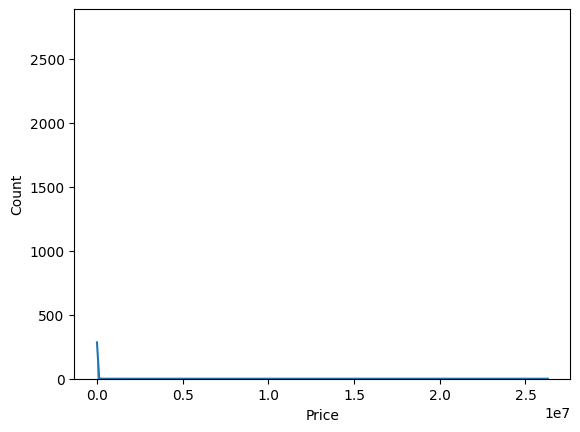

In [7]:
sns.histplot(x=data['Price'],kde=True)

In [8]:
data['Price'].max()

26307500

In [9]:
# Checking the outlier

print(data['Price'].quantile(1))
print(data['Price'].quantile(0.99))

26307500.0
84675.0


We are not getting a proper graph for price column, because of the outlier is too high.


In [10]:
tmpData=data[data['Price']<data['Price'].quantile(0.99)]

<Axes: xlabel='Price', ylabel='Count'>

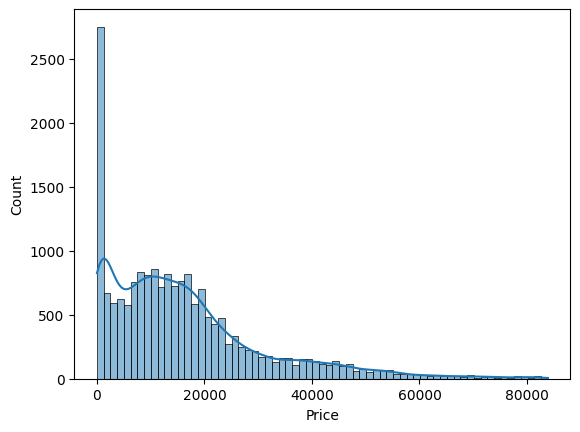

In [11]:
sns.histplot(tmpData['Price'],kde=True)

We concluded that most of the cars are in mid-range only....And the cars with too high prices are very few in numbers.

# ***Analyzing the total manufacturers***

<Axes: xlabel='Manufacturer', ylabel='count'>

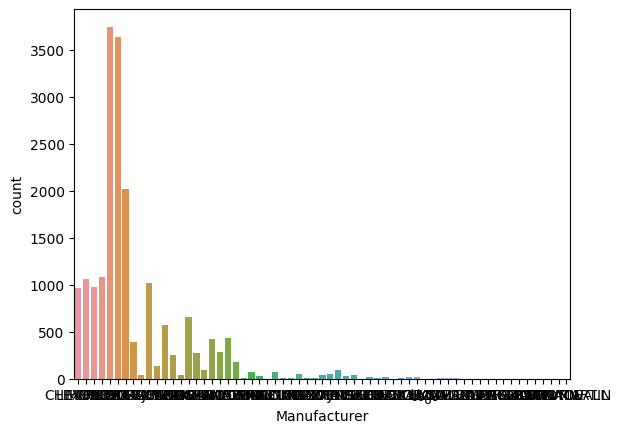

In [12]:
sns.countplot(x=tmpData['Manufacturer'])

In [13]:
tmpData['Manufacturer'].value_counts()

HYUNDAI          3748
TOYOTA           3645
MERCEDES-BENZ    2027
FORD             1089
CHEVROLET        1066
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: Manufacturer, Length: 63, dtype: int64

As there are 63 different manufacturers, we cant clearly analyse the countplot, so we can also check the each manufacturer's quantity with value_counts() func or plotly also.

In [14]:
px.bar(x=tmpData['Manufacturer'])

In [15]:
tmpData['Model'].value_counts()

Prius              1083
Sonata             1079
Camry               936
Elantra             922
E 350               542
                   ... 
Move                  1
325 CI                1
C 230 kompresor       1
Tiida 2008            1
Prius C aqua          1
Name: Model, Length: 1548, dtype: int64

# ***NOTE->***
As there are 1548 unique models, so we can drop this columns as this is too much as compared to the total dataset length. And also as we've other specs too which can describe all the features of the car. So we can drop the model column.

<Axes: xlabel='Prod. year', ylabel='count'>

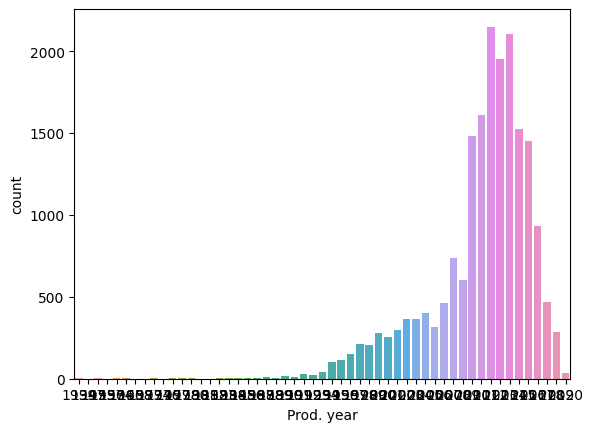

In [16]:
sns.countplot(x=tmpData['Prod. year'])

In [17]:
tmpData['Prod. year'].value_counts().shape

(53,)

As there are only 53 unique years, we will keep this column and we'll keep this column as numerical only instead of categorical.

<Axes: xlabel='Category', ylabel='count'>

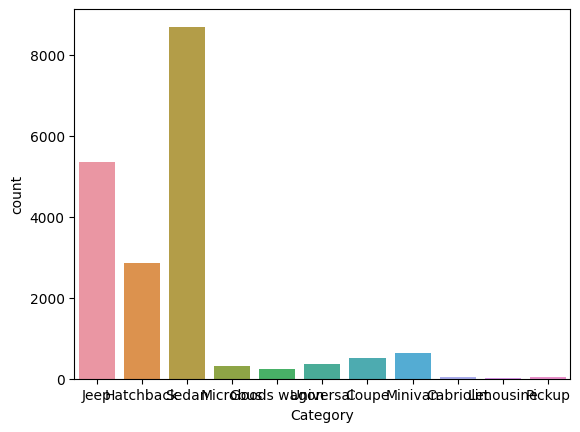

In [18]:
sns.countplot(x=tmpData['Category'])

<Axes: xlabel='Category', ylabel='Price'>

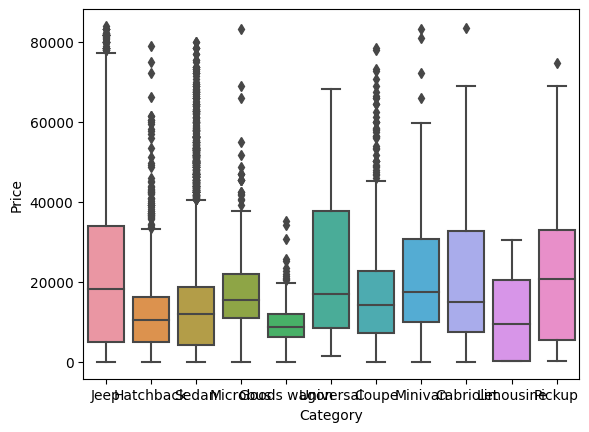

In [19]:
sns.boxplot(x=tmpData['Category'],y=tmpData['Price'])

In [20]:
tmpData['Category'].value_counts()

Sedan          8694
Jeep           5349
Hatchback      2847
Minivan         644
Coupe           519
Universal       360
Microbus        303
Goods wagon     231
Pickup           48
Cabriolet        35
Limousine        11
Name: Category, dtype: int64

<Axes: xlabel='Leather interior', ylabel='count'>

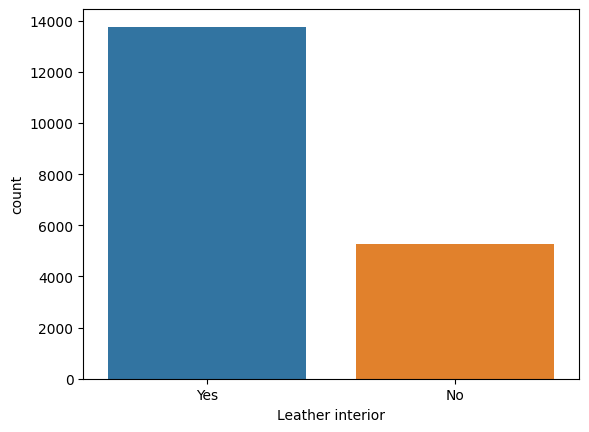

In [21]:
sns.countplot(x=tmpData['Leather interior'])

<Axes: xlabel='Fuel type', ylabel='count'>

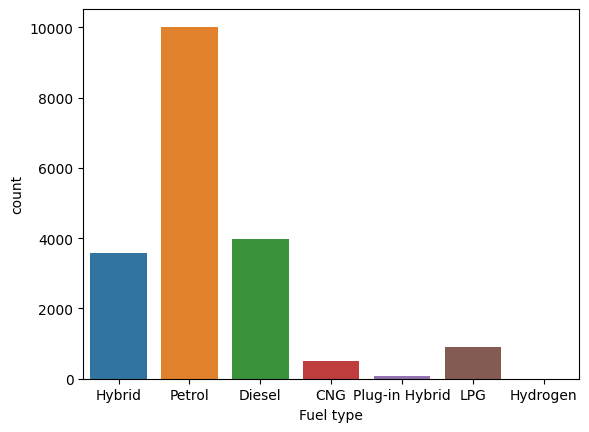

In [22]:
sns.countplot(x=tmpData['Fuel type'])

<Axes: xlabel='Engine volume', ylabel='count'>

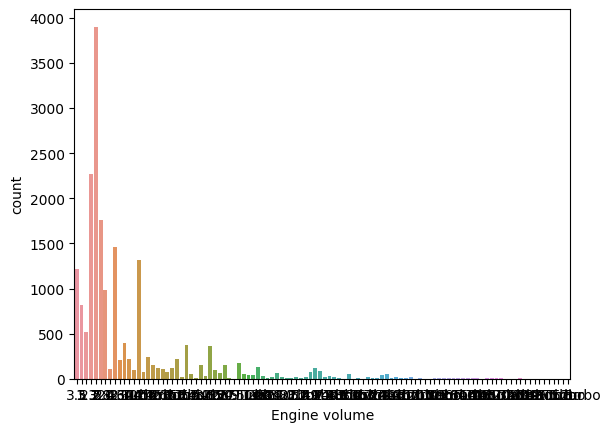

In [23]:
sns.countplot(x=tmpData['Engine volume'])

In [24]:
tmpData['Engine volume'].value_counts()

2            3902
2.5          2272
1.8          1760
1.6          1462
1.5          1321
             ... 
0.8 Turbo       1
6.7             1
0.5             1
7.3             1
1.1 Turbo       1
Name: Engine volume, Length: 104, dtype: int64

In [25]:
tmpData['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7', '4.8 Turbo',
       '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4', '1.7 Turbo',
       '2.7 Turbo', '4.3', '4.2', '2.9 Turbo', '0', '4.4 Turbo', '20',
       '3.6 Turbo', '0.3', '3.7 Turbo', '5.9', '0.2', '2.1 Turbo', '5.6',
       '6', '0.7 Turbo', '0.6 Turbo', '4.5', '5.5 Turbo', '0.6', '7.3',
       '0.1', '1.0 Turbo', '6.3', '4.5 Turbo', '0.8 Turbo', '4.2 Turbo',
       '3.1', '5.0 Turbo', '6.4', '3.9', '0.9', '4.0 Turbo', '6.3 Turbo',
  

Here we 2 types of values filled in Engine Volume Column, 1 is without turbo AND other is with Turbo. So we need to separate this

We will analyze whether manufacturers column affect the price or not.

<Axes: xlabel='Manufacturer', ylabel='count'>

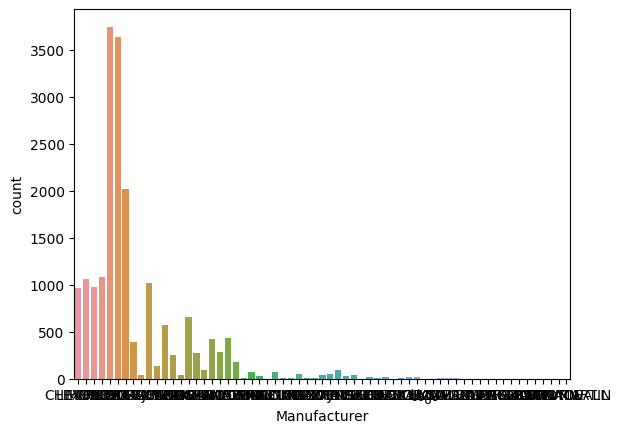

In [26]:
sns.countplot(x=tmpData['Manufacturer'])

In [27]:
tmpData['Manufacturer'].value_counts()

HYUNDAI          3748
TOYOTA           3645
MERCEDES-BENZ    2027
FORD             1089
CHEVROLET        1066
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: Manufacturer, Length: 63, dtype: int64

In [28]:
tmpData.groupby('Manufacturer')['Manufacturer'].count().sort_values(ascending=False).head(10)

Manufacturer
HYUNDAI          3748
TOYOTA           3645
MERCEDES-BENZ    2027
FORD             1089
CHEVROLET        1066
BMW              1021
HONDA             975
LEXUS             966
NISSAN            660
VOLKSWAGEN        579
Name: Manufacturer, dtype: int64

<Axes: xlabel='Manufacturer', ylabel='Price'>

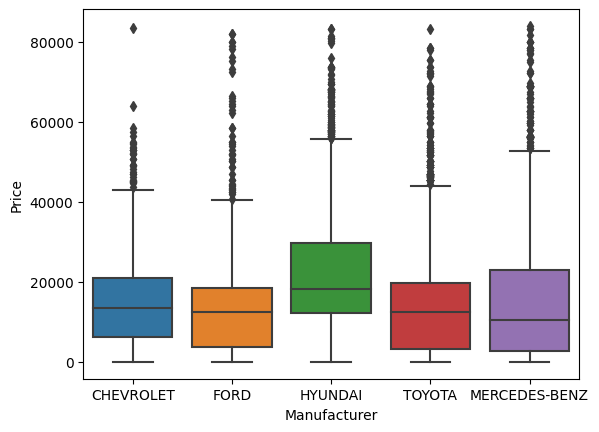

In [29]:
manufacData=tmpData[tmpData['Manufacturer'].isin(['HYUNDAI','TOYOTA','MERCEDES-BENZ','FORD','CHEVROLET'])]
sns.boxplot(x=manufacData['Manufacturer'],y=manufacData['Price'])

In [30]:
(tmpData['Manufacturer'].value_counts()<5).sum()

19

So there are 19 Manufacturers where we have less than 5 sample of car in them

# ***Data Processing***

In [31]:
# Things we need to do:-

# Standardising the Data"-
# 1- Drop model
# 2- Engine volumne--> Divide it in 2 columns
# 3- Convert mileage into int
# 4- Make changes in Doors
# 5- We will make 1 category for the Manufacturer column where-tmpData['Manufacturer'].value_counts()<5)

In [32]:
data.drop('Model',axis=1,inplace=True)

In [33]:
data.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [34]:
data['Leather interior'].values

array(['Yes', 'No', 'No', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

In [35]:
def processEngineVolume(enginecol):
 volume=[]
 turbo=[]
 for val in data['Engine volume'].values:
  output=val.split(" ")
  if len(output)>1:
   volume.append(float(output[0]))
   turbo.append("Turbo")
  else:
   volume.append(float(output[0]))
   turbo.append("Normal")
 return volume,turbo


In [36]:
enginevolume,enginetype=processEngineVolume(data['Engine volume'])
data['EngineVolume']=enginevolume
data['EngineType']=enginetype
data.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,EngineVolume,EngineType
0,13328,1399,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,3.5,Normal
1,16621,1018,CHEVROLET,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,3.0,Normal
2,8467,-,HONDA,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,1.3,Normal
3,3607,862,FORD,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,2.5,Normal
4,11726,446,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,1.3,Normal


In [37]:
data['EngineType'].value_counts()

Normal    17306
Turbo      1931
Name: EngineType, dtype: int64

In [38]:
data.drop('Engine volume',axis=1,inplace=True)

In [39]:
data['EngineVolume'].dtype

dtype('float64')

In [40]:
data['Mileage']=data['Mileage'].apply(lambda x:x.split(' ')[0])

In [41]:
data.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,EngineVolume,EngineType
0,13328,1399,LEXUS,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,3.5,Normal
1,16621,1018,CHEVROLET,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,3.0,Normal
2,8467,-,HONDA,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,1.3,Normal
3,3607,862,FORD,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,2.5,Normal
4,11726,446,HONDA,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,1.3,Normal


In [42]:
data['Doors']=data['Doors'].apply(lambda x:x.split("-")[0])
data['Doors']=data['Doors'].apply(lambda x:x[1] if x.startswith('0') else x)
data.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,EngineVolume,EngineType
0,13328,1399,LEXUS,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,3.5,Normal
1,16621,1018,CHEVROLET,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,3.0,Normal
2,8467,-,HONDA,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,1.3,Normal
3,3607,862,FORD,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,4,Left wheel,White,0,2.5,Normal
4,11726,446,HONDA,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,1.3,Normal


In [43]:
data.Doors.value_counts()

4     18332
2       777
>5      128
Name: Doors, dtype: int64

In [44]:
data.shape

(19237, 17)

In [45]:
manufacturers=data['Manufacturer'].value_counts().index
less_occuring_manufacturers=manufacturers[data['Manufacturer'].value_counts()<10]

In [46]:
# Replacing all the manufacturers to others, having value_count<10:-

data['Manufacturer'].replace(less_occuring_manufacturers,"Others",inplace=True)

In [47]:
data['Manufacturer'].value_counts()

HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
BMW              1049
LEXUS             982
HONDA             977
NISSAN            660
VOLKSWAGEN        579
SSANGYONG         441
KIA               421
OPEL              397
MITSUBISHI        289
SUBARU            275
AUDI              255
MAZDA             183
JEEP              138
DAEWOO             91
DODGE              91
FIAT               78
SUZUKI             76
Others             66
PORSCHE            54
LAND ROVER         49
VAZ                48
MINI               48
JAGUAR             42
RENAULT            37
INFINITI           30
CHRYSLER           26
SKODA              20
VOLVO              19
PEUGEOT            17
BUICK              16
GMC                15
LINCOLN            15
ACURA              15
CADILLAC           14
DAIHATSU           13
GAZ                12
UAZ                12
Name: Manufacturer, dtype: int64

In [48]:
data.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,EngineVolume,EngineType
0,13328,1399,LEXUS,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,3.5,Normal
1,16621,1018,CHEVROLET,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,3.0,Normal
2,8467,-,HONDA,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,1.3,Normal
3,3607,862,FORD,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,4,Left wheel,White,0,2.5,Normal
4,11726,446,HONDA,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,1.3,Normal


In the Levy column 3 row, is "-", so we need to replace it np.nan in the entire dataset

In [49]:
data.replace("-",np.nan,inplace=True)

In [50]:
data.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,EngineVolume,EngineType
0,13328,1399,LEXUS,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,3.5,Normal
1,16621,1018,CHEVROLET,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,3.0,Normal
2,8467,NaN,HONDA,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,1.3,Normal
3,3607,862,FORD,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,4,Left wheel,White,0,2.5,Normal
4,11726,446,HONDA,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,1.3,Normal


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              13418 non-null  object 
 2   Manufacturer      19237 non-null  object 
 3   Prod. year        19237 non-null  int64  
 4   Category          19237 non-null  object 
 5   Leather interior  19237 non-null  object 
 6   Fuel type         19237 non-null  object 
 7   Mileage           19237 non-null  object 
 8   Cylinders         19237 non-null  float64
 9   Gear box type     19237 non-null  object 
 10  Drive wheels      19237 non-null  object 
 11  Doors             19237 non-null  object 
 12  Wheel             19237 non-null  object 
 13  Color             19237 non-null  object 
 14  Airbags           19237 non-null  int64  
 15  EngineVolume      19237 non-null  float64
 16  EngineType        19237 non-null  object

We observed that, we need to change the datatype of Levy and Mileage into int:-
BUT NOTE--> While converting Levy to int, an error was showing that float can't be converted to int, that's why we changed it to float

In [52]:
data['Levy']=data['Levy'].astype(np.float64)
data['Mileage']=data['Mileage'].astype(np.int64)

# ***Data Preprocessing***

In [53]:
data.isnull().sum()/data.shape[0]

Price               0.00000
Levy                0.30249
Manufacturer        0.00000
Prod. year          0.00000
Category            0.00000
Leather interior    0.00000
Fuel type           0.00000
Mileage             0.00000
Cylinders           0.00000
Gear box type       0.00000
Drive wheels        0.00000
Doors               0.00000
Wheel               0.00000
Color               0.00000
Airbags             0.00000
EngineVolume        0.00000
EngineType          0.00000
dtype: float64

As Levy column contains more than 30% null values, we should drop this column

In [54]:
data[data['Levy'].isnull()]

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,EngineVolume,EngineType
2,8467,NaN,HONDA,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,1.3,Normal
9,26657,NaN,LEXUS,2007,Jeep,Yes,Petrol,128500,6.0,Automatic,4x4,4,Left wheel,Silver,12,3.5,Normal
11,8781,NaN,FORD,1999,Microbus,No,CNG,0,8.0,Manual,Rear,2,Left wheel,Blue,0,4.0,Normal
12,3000,NaN,OPEL,1997,Goods wagon,No,CNG,350000,4.0,Manual,Front,4,Left wheel,White,4,1.6,Normal
23,7840,NaN,FORD,2001,Microbus,No,Diesel,230000,4.0,Manual,Front,2,Left wheel,White,0,2.0,Turbo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19223,8781,NaN,DODGE,2008,Hatchback,No,Petrol,0,4.0,Automatic,Front,4,Left wheel,Blue,4,2.4,Normal
19224,19130,NaN,KIA,2014,Sedan,Yes,Petrol,35800,4.0,Automatic,Front,4,Left wheel,Black,12,2.4,Normal
19226,7840,NaN,NISSAN,2003,Sedan,Yes,Petrol,220000,6.0,Tiptronic,Rear,4,Right-hand drive,White,0,3.0,Normal
19229,50,NaN,TOYOTA,2008,Hatchback,No,Hybrid,150000,4.0,Automatic,Front,4,Left wheel,Silver,6,1.5,Normal


In [55]:
data.drop('Levy',axis=1,inplace=True)

In [56]:
numerical_cols = ['Price', 'Mileage','Cylinders','Airbags','EngineVolume']  # We've added price to numerical_cols list as, while when we got 3 outliers and we are creating them nans, then the price column will remain as nan if we dont include it here

In [57]:
OUTLIER_DETECT=['Price','Mileage']  # We're doing oulier detect on price column, as the price have too many outliers and while our model, RMS will be too high as the actual vs predicted value for costliest cars will vary too much.

# NOTE-->  We tried detecting outliers with IQR also, but the number of outliers were too much, so then we try Zscore.

def DetectOutlier_Zscore(data,col_name,numerical_cols):
  col_values=data.loc[:,col_name]
  upper_limit=col_values.mean()+3*col_values.std()
  lower_limit=col_values.mean()-3*col_values.std()

  outliers=np.logical_or(col_values.values>upper_limit,col_values.values<lower_limit)
  idxs=np.where(outliers)[0]

  print(f'Outliers detected:{len(idxs)}')

  plt.plot([upper_limit]*data.shape[0]) # To get a straight line
  plt.plot([lower_limit]*data.shape[0])
  plt.scatter(x=[i for i in range(data.shape[0])],y=col_values)
  plt.xlabel("Data Points ")
  plt.ylabel(col_name)
  plt.title(f'Outliers in {col_name }')
  plt.show()

  print("Fixing Outliers")

  data.loc[idxs,col_name]=np.nan
  imputer=KNNImputer()
  data.loc[:,numerical_cols]=imputer.fit_transform(data.loc[:,numerical_cols])


  plt.plot([upper_limit]*data.shape[0])
  plt.plot([lower_limit]*data.shape[0])
  plt.scatter(x=[i for i in range(data.shape[0])],y=data.loc[:,col_name].values)
  plt.xlabel("Data Points")
  plt.ylabel(col_name)
  plt.title(f'Outliers in {col_name }')
  plt.show()

  return data

Outliers detected:3


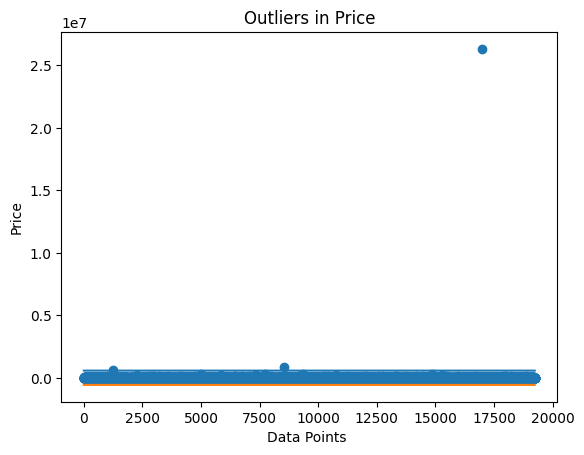

Fixing Outliers


<ipython-input-57-bbe866a29aca>:27: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



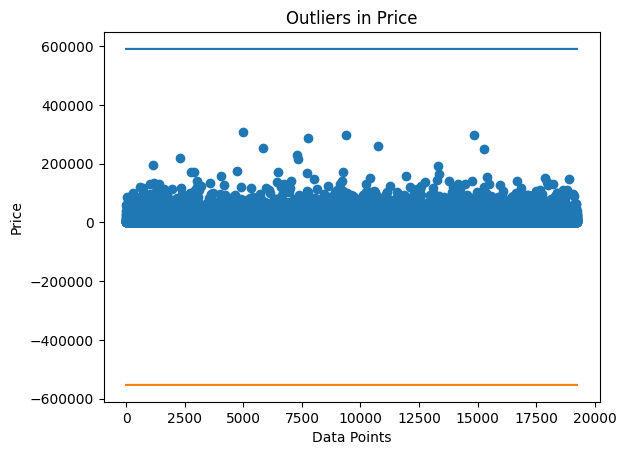

Outliers detected:18


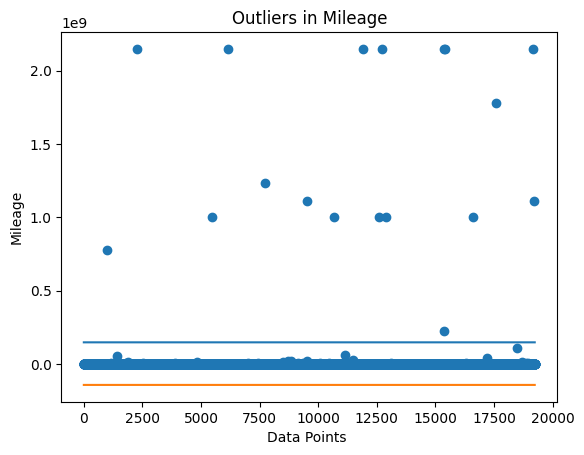

Fixing Outliers


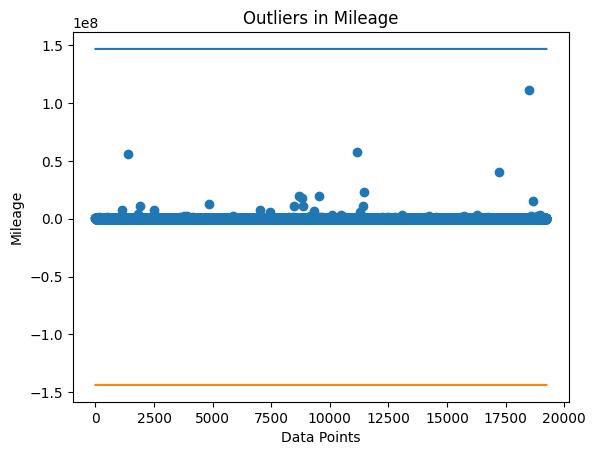

In [58]:
for outlier_col in OUTLIER_DETECT:
  data=DetectOutlier_Zscore(data,outlier_col,numerical_cols)

In [59]:
def ApplyLabelEncoder(data,col_name):
  Le=LabelEncoder()
  data[col_name]=Le.fit_transform(data[col_name])
  return data

def ApplyOneHotEncoder(data,col_name):
  ohe=OneHotEncoder()
  encodings=ohe.fit_transform(data[[col_name]]).todense()
  columns=[col_name+"_"+str(categorie) for categorie in ohe.categories_[0][:-1]]
  encodings=pd.DataFrame(encodings[:,:-1],columns=columns)



  data=pd.concat([data,encodings],axis=1)
  data.drop([col_name],axis=1,inplace=True)
  return data

def HandleCategoricaldata(data,ohe_cols,le_cols):
  for col in le_cols:
    data=ApplyLabelEncoder(data,col)

  for col in ohe_cols:
    data=ApplyOneHotEncoder(data,col)
  return data

In [60]:
data.head()

,Price,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,EngineVolume,EngineType
0,13328.0,LEXUS,2010,Jeep,Yes,Hybrid,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12.0,3.5,Normal
1,16621.0,CHEVROLET,2011,Jeep,No,Petrol,192000.0,6.0,Tiptronic,4x4,4,Left wheel,Black,8.0,3.0,Normal
2,8467.0,HONDA,2006,Hatchback,No,Petrol,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2.0,1.3,Normal
3,3607.0,FORD,2011,Jeep,Yes,Hybrid,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0.0,2.5,Normal
4,11726.0,HONDA,2014,Hatchback,Yes,Petrol,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4.0,1.3,Normal


In [61]:
# We will check the value_counts of each column and then correspondingly we can put that column under ohe & le.
# For LE --> 2 categories
# For Ohe --> 2> and < 7 categories

ohe_cols = ['Fuel type', 'Gear box type', 'Drive wheels', 'Doors']
le_cols = ['Manufacturer', 'Category', 'Leather interior', 'Wheel', 'Color', 'EngineType']

data = HandleCategoricaldata(data, ohe_cols, le_cols)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    19237 non-null  float64
 1   Manufacturer             19237 non-null  int64  
 2   Prod. year               19237 non-null  int64  
 3   Category                 19237 non-null  int64  
 4   Leather interior         19237 non-null  int64  
 5   Mileage                  19237 non-null  float64
 6   Cylinders                19237 non-null  float64
 7   Wheel                    19237 non-null  int64  
 8   Color                    19237 non-null  int64  
 9   Airbags                  19237 non-null  float64
 10  EngineVolume             19237 non-null  float64
 11  EngineType               19237 non-null  int64  
 12  Fuel type_CNG            19237 non-null  float64
 13  Fuel type_Diesel         19237 non-null  float64
 14  Fuel type_Hybrid      

So we've successfully converted all the categorical cols to numeric cols

In [63]:
X=data.iloc[:,1:].values
Y=data.iloc[:,0].values

In [64]:
# X1 (0-1), X2 (0-100)
# Prediction = X1.W1 + X2.W2

# X1 (0-1), X2 (0-1)
#

# Prediction = W.X + b

# MinMax Scaler - brings values between 0 and 1
#   ScaledValue = (Value - Min)/(Max - Min)
# Standard Sclaer - brings mean -> 0 and std -> 1
#   ScaledValue = (Value - Mean)/Std

Scaler = MinMaxScaler()
X_scale = Scaler.fit_transform(X)
Y_scale = (Y - np.min(Y))/(np.max(Y) - np.min(Y)) # We are creating custom code for converting Y to Y_scaled because MinMaxScaler work on matrix only not on single column.

# Y_scale*((np.max(Y) - np.min(Y)) + np.min(Y) --> unscaled_value

# NOTE --> Y is large,so W might also be very large that's why scaling Y.

In [65]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=4)

In [66]:
def MeanSquaredError(Actual,Prediction):
  return np.mean(np.square(Actual-Prediction))

def RootMeanSquaredError(Actual,Prediction):
  return np.sqrt(MeanSquaredError(Actual,Prediction))

def MeanAbsuloteError(Actual,Prediction):
  return np.mean(np.abs(Actual-Prediction))

def R2Score(Actual,Prediction):
  SSR=np.sum(np.square(Actual-Prediction))
  SSM=np.sum(np.square(Actual-np.mean(Actual)))
  return 1-(SSR/SSM)

def PrintMetrics(Actual,Prediction):
  print(" MeanSquaredError : ", MeanSquaredError(Actual, Prediction))
  print(" RootMeanSquaredError : ", RootMeanSquaredError(Actual, Prediction))
  print(" MeanAbsolutedError : ", MeanAbsuloteError(Actual, Prediction))
  print(" R2 Score : ", R2Score(Actual, Prediction))

In [67]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [68]:
model = LinearRegression()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)
PrintMetrics(ytest, predictions)

 MeanSquaredError :  245641925.53178433
 RootMeanSquaredError :  15672.967987327234
 MeanAbsolutedError :  10272.555775983039
 R2 Score :  0.2523168914071423


In [69]:
model = RandomForestRegressor()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)
PrintMetrics(ytest, predictions)

 MeanSquaredError :  104147657.42670465
 RootMeanSquaredError :  10205.275960340545
 MeanAbsolutedError :  4587.691946546174
 R2 Score :  0.6829961168522642


Comparing R2_Scores, RandomForestRegressor is the best model.


In [71]:
actual_answers=ytest*(np.max(Y)-np.min(Y))+np.min(Y)
actual_predictions=predictions*(np.max(Y)-np.min(Y))+np.min(Y)
print(" Actual Value : ", actual_answers[0], " Predicted Value : ", actual_predictions[0])

 Actual Value :  5618673046.0  Predicted Value :  4974760573.5


In [74]:
pickle.dump(model,open('model.pkl','wb'))